# References

#### Examples
 - [Sample pipeline for text feature extraction and evaluation](https://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html)
 - [Column Transformer with Mixed Types](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#sphx-glr-auto-examples-compose-plot-column-transformer-mixed-types-py)
 - [A Deep Dive Into Sklearn Pipelines](https://www.kaggle.com/baghern/a-deep-dive-into-sklearn-pipelines)
 - [Introducing the ColumnTransformer](https://jorisvandenbossche.github.io/blog/2018/05/28/scikit-learn-columntransformer/)
 - [Selecting dimensionality reduction with Pipeline and GridSearchCV](https://scikit-learn.org/stable/auto_examples/compose/plot_compare_reduction.html)
 - [Using XGBoost with sklearn](https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn)
 
#### Documentation
 - [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
 - [FeatureUnion](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html)
 - [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
 - [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
 - [LabelBinarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html)
 - [XGBoost](https://xgboost.readthedocs.io/en/latest/python/python_api.html)

# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data

In [2]:
# food = pd.read_csv('../scrapdata/FoodBalanceSheets_E_All_Data.csv', encoding = 'latin1')

In [3]:
vit = pd.read_csv('../data/no-show-300k.csv')

# Transformations required for modeling
def transform_vitoria(df):
    new_names = ['age', 'gender', 'app_registration', 'app_date', 'week_day', 'show_up',
                 'diabetes', 'alcoholism', 'hypertension', 'handicap', 'smokes', 
                 'monetary_help', 'tuberculosis', 'sms_reminder', 'days_to_appointment']
    new_order = ['age', 'gender', 'week_day', 'days_to_appointment', 'diabetes', 'alcoholism', 
                 'hypertension', 'handicap', 'smokes', 'monetary_help', 'tuberculosis', 
                 'sms_reminder', 'show_up']
    df.columns = new_names
    df = df.loc[:, new_order]
    df.loc[:, 'week_day'] = df.loc[:, 'week_day'].str.lower()
    df.loc[:, 'gender'] = df.loc[:, 'gender'].str.lower()
    df.loc[:, 'days_to_appointment'] = df.loc[:, 'days_to_appointment'] * -1
    df = df.replace({'show_up': {'Show-Up': 1, 'No-Show': 0, '2': 0}})
    
    return df

vit = transform_vitoria(vit)
vit.head()

,age,gender,week_day,days_to_appointment,diabetes,alcoholism,hypertension,handicap,smokes,monetary_help,tuberculosis,sms_reminder,show_up
0,19,m,wednesday,29,0,0,0,0,0,0,0,0,1
1,24,f,wednesday,1,0,0,0,0,0,0,0,0,1
2,4,f,tuesday,1,0,0,0,0,0,0,0,0,1
3,5,m,thursday,15,0,0,0,0,0,0,0,1,1
4,38,m,tuesday,6,0,0,0,0,0,0,0,1,1


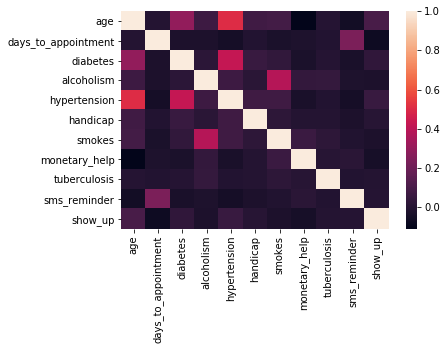

In [15]:
sns.heatmap(vit.corr("pearson"), annot=False)

In [13]:
vit.corr("spearman")

,age,days_to_appointment,diabetes,alcoholism,hypertension,handicap,smokes,monetary_help,tuberculosis,sms_reminder,show_up
age,1.000000,-0.076000,0.297305,0.075201,0.511573,0.082648,0.093173,-0.108838,0.001180,-0.052104,0.101835
days_to_appointment,-0.076000,1.000000,-0.051439,-0.025348,-0.081945,-0.021473,-0.030423,-0.000172,-0.007529,0.413095,-0.094293
diabetes,0.297305,-0.051439,1.000000,0.020542,0.424342,0.061046,0.038678,-0.027251,0.001451,-0.032531,0.031073
alcoholism,0.075201,-0.025348,0.020542,1.000000,0.069894,0.016721,0.385782,0.039615,0.045920,-0.019235,-0.025459
hypertension,0.511573,-0.081945,0.424342,0.069894,1.000000,0.083375,0.075977,-0.032419,-0.004639,-0.045788,0.059053
handicap,0.082648,-0.021473,0.061046,0.016721,0.083375,1.000000,0.025310,-0.004172,-0.002926,-0.023063,0.006691
smokes,0.093173,-0.030423,0.038678,0.385782,0.075977,0.025310,1.000000,0.064070,0.025349,-0.010658,-0.024055
monetary_help,-0.108838,-0.000172,-0.027251,0.039615,-0.032419,-0.004172,0.064070,1.000000,0.007927,0.015804,-0.041030
tuberculosis,0.001180,-0.007529,0.001451,0.045920,-0.004639,-0.002926,0.025349,0.007927,1.000000,-0.006754,-0.003823
sms_reminder,-0.052104,0.413095,-0.032531,-0.019235,-0.045788,-0.023063,-0.010658,0.015804,-0.006754,1.000000,0.000330


# Visualization

/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5,1,'Sunday')

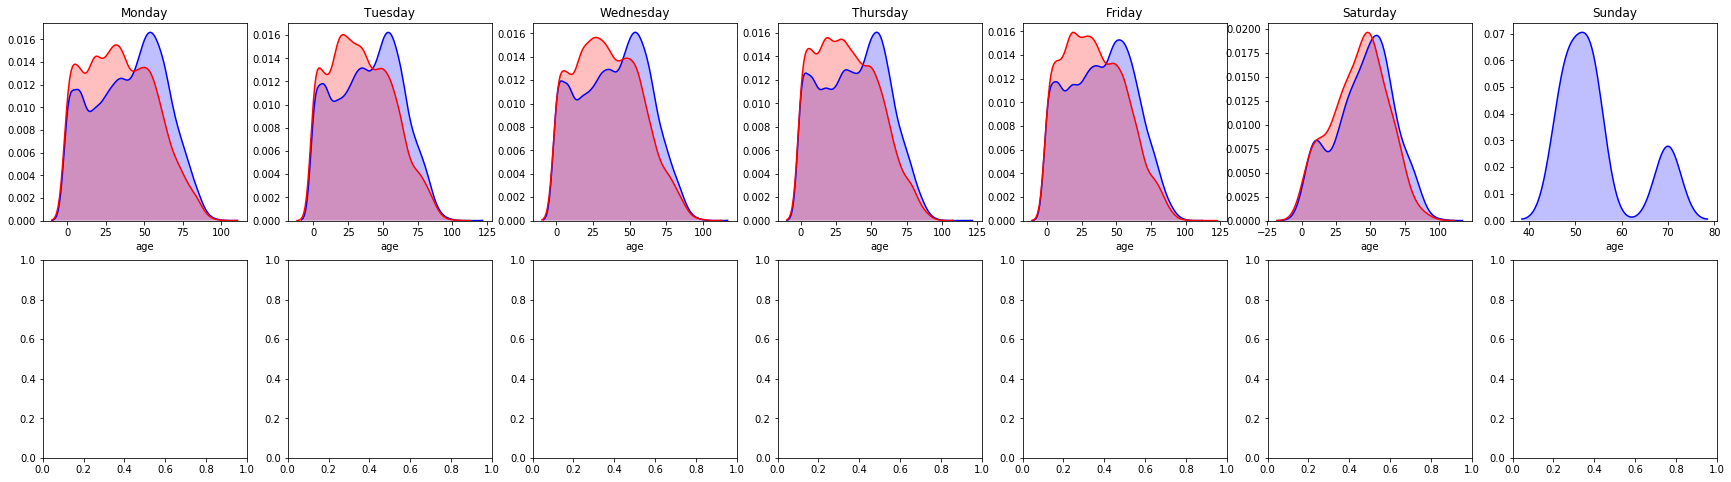

In [18]:
fig, ax = plt.subplots(2, 7, figsize=(30, 8))

sns.distplot(vit.loc[vit.show_up == 1].loc[vit.week_day == 'monday'].age, color='blue', hist=False, kde_kws={'shade':True}, ax=ax[0,0])
sns.distplot(vit.loc[vit.show_up == 0].loc[vit.week_day == 'monday'].age, color='red', hist=False, kde_kws={'shade':True}, ax=ax[0,0])
ax[0,0].set_title('Monday')

sns.distplot(vit.loc[vit.show_up == 1].loc[vit.week_day == 'tuesday'].age, color='blue', hist=False, kde_kws={'shade':True}, ax=ax[0,1])
sns.distplot(vit.loc[vit.show_up == 0].loc[vit.week_day == 'tuesday'].age, color='red', hist=False, kde_kws={'shade':True}, ax=ax[0,1])
ax[0,1].set_title('Tuesday')

sns.distplot(vit.loc[vit.show_up == 1].loc[vit.week_day == 'wednesday'].age, color='blue', hist=False, kde_kws={'shade':True}, ax=ax[0,2])
sns.distplot(vit.loc[vit.show_up == 0].loc[vit.week_day == 'wednesday'].age, color='red', hist=False, kde_kws={'shade':True}, ax=ax[0,2])
ax[0,2].set_title('Wednesday')

sns.distplot(vit.loc[vit.show_up == 1].loc[vit.week_day == 'thursday'].age, color='blue', hist=False, kde_kws={'shade':True}, ax=ax[0,3])
sns.distplot(vit.loc[vit.show_up == 0].loc[vit.week_day == 'thursday'].age, color='red', hist=False, kde_kws={'shade':True}, ax=ax[0,3])
ax[0,3].set_title('Thursday')

sns.distplot(vit.loc[vit.show_up == 1].loc[vit.week_day == 'friday'].age, color='blue', hist=False, kde_kws={'shade':True}, ax=ax[0,4])
sns.distplot(vit.loc[vit.show_up == 0].loc[vit.week_day == 'friday'].age, color='red', hist=False, kde_kws={'shade':True}, ax=ax[0,4])
ax[0,4].set_title('Friday')

sns.distplot(vit.loc[vit.show_up == 1].loc[vit.week_day == 'saturday'].age, color='blue', hist=False, kde_kws={'shade':True}, ax=ax[0,5])
sns.distplot(vit.loc[vit.show_up == 0].loc[vit.week_day == 'saturday'].age, color='red', hist=False, kde_kws={'shade':True}, ax=ax[0,5])
ax[0,5].set_title('Saturday')

sns.distplot(vit.loc[vit.show_up == 1].loc[vit.week_day == 'sunday'].age, color='blue', hist=False, kde_kws={'shade':True}, ax=ax[0,6])
sns.distplot(vit.loc[vit.show_up == 0].loc[vit.week_day == 'sunday'].age, color='red', hist=False, kde_kws={'shade':True}, ax=ax[0,6])
ax[0,6].set_title('Sunday')

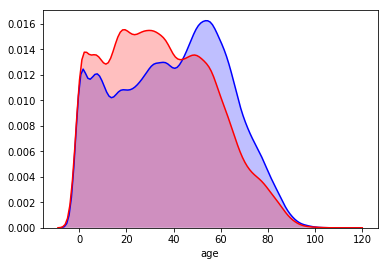

In [33]:
sns.distplot(vit[vit.show_up == 1].age, color='blue', hist=False, kde_kws={'shade':True})
sns.distplot(vit[vit.show_up == 0].age, color='red', hist=False, kde_kws={'shade':True})

([<matplotlib.axis.XTick object at 0x7f37dc8eab70>, <matplotlib.axis.XTick object at 0x7f37dc8ea4a8>, <matplotlib.axis.XTick object at 0x7f37dc8ea390>, <matplotlib.axis.XTick object at 0x7f37d2c9ce10>, <matplotlib.axis.XTick object at 0x7f37d2cc0278>, <matplotlib.axis.XTick object at 0x7f37d2cc0a90>, <matplotlib.axis.XTick object at 0x7f37d2cc0438>], <a list of 7 Text xticklabel objects>)


None

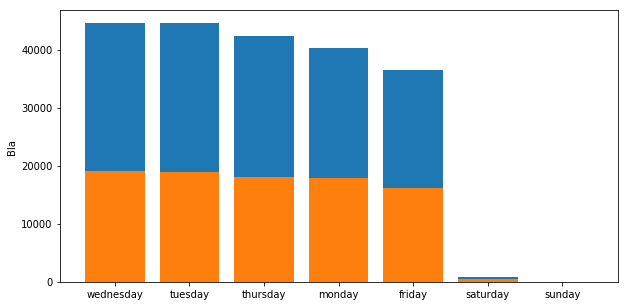

In [54]:
plt.figure(figsize = (10, 5))
plt.bar(np.arange(7), vit[vit.show_up == 1].week_day.value_counts(), width=0.8)
plt.bar(np.arange(7), vit[vit.show_up == 0].week_day.value_counts(), width=0.8)
ticks = plt.xticks(np.arange(7), vit.week_day.value_counts().index)
plt.ylabel('Bla')
display(print(ticks))

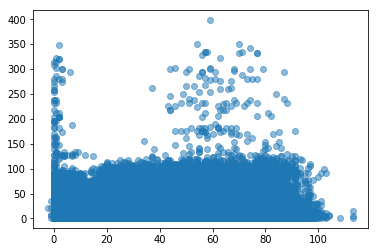

In [55]:
plt.scatter(data.age, data.days_to_appointment, alpha=0.5)

---

# Preprocessing

In [4]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


data = pd.get_dummies(vit)
#encoder = OneHotEncoder(sparse=False)

#categorical_features = ['gender', 'week_day']
#categorical_encoder = OneHotEncoder(sparse=False)
#categorical_transformer = ColumnTransformer([('cat', categorical_encoder, categorical_features)], remainder='passthrough')

#preprocess = Pipeline([('cat_transformer', categorical_transformer)])

X = data.drop('show_up', axis=1)
y = data.loc[:, 'show_up']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# XGBoostClassifier

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from xgboost import XGBClassifier

clf = XGBClassifier(n_estimators=100, n_jobs=4, silent=False)

grid_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.3, 0.5]
}

scorer = make_scorer(f1_score)

def custom_f1_eval(y_pred, y_true):
    labels = y_true.get_label()
    y_bin = [1. if y_cont > 0.5 else 0. for y_cont in y_pred]
    return 'f1_score', f1_score(labels, y_bin)

fit_params = {
    'eval_set': [(X_test, y_test)],
    'eval_metric': custom_f1_eval,
    'early_stopping_rounds': 20,
    'verbose': True
}

grid = GridSearchCV(clf, grid_params, cv=5, n_jobs=-1, verbose=True, scoring=scorer)

In [18]:
grid.fit(X_train, y_train, **fit_params)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[0]	validation_0-error:0.30108	validation_0-f1_score:0.822782
Multiple eval metrics have been passed: 'validation_0-f1_score' will be used for early stopping.

Will train until validation_0-f1_score hasn't improved in 20 rounds.
[0]	validation_0-error:0.30108	validation_0-f1_score:0.822782
Multiple eval metrics have been passed: 'validation_0-f1_score' will be used for early stopping.

Will train until validation_0-f1_score hasn't improved in 20 rounds.
[0]	validation_0-error:0.30108	validation_0-f1_score:0.822782
Multiple eval metrics have been passed: 'validation_0-f1_score' will be used for early stopping.

Will train until validation_0-f1_score hasn't improved in 20 rounds.
[0]	validation_0-error:0.30108	validation_0-f1_score:0.822782
Multiple eval metrics have been passed: 'validation_0-f1_score' will be used for early stopping.

Will train until validation_0-f1_score hasn't improved in 20 rounds.
[1]	validation_0-error:0

[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 23.8min finished


[0]	validation_0-error:0.30108	validation_0-f1_score:0.822782
Multiple eval metrics have been passed: 'validation_0-f1_score' will be used for early stopping.

Will train until validation_0-f1_score hasn't improved in 20 rounds.
[1]	validation_0-error:0.30108	validation_0-f1_score:0.822782
[2]	validation_0-error:0.30108	validation_0-f1_score:0.822782
[3]	validation_0-error:0.30108	validation_0-f1_score:0.822782
[4]	validation_0-error:0.30108	validation_0-f1_score:0.822782
[5]	validation_0-error:0.30108	validation_0-f1_score:0.822782
[6]	validation_0-error:0.30108	validation_0-f1_score:0.822782
[7]	validation_0-error:0.30108	validation_0-f1_score:0.822782
[8]	validation_0-error:0.30108	validation_0-f1_score:0.822782
[9]	validation_0-error:0.30108	validation_0-f1_score:0.822782
[10]	validation_0-error:0.30108	validation_0-f1_score:0.822782
[11]	validation_0-error:0.30108	validation_0-f1_score:0.822782
[12]	validation_0-error:0.30108	validation_0-f1_score:0.822782
[13]	validation_0-error:

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=4, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.3, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score), verbose=True)

In [19]:
best = grid.best_estimator_

In [20]:
preds = best.predict(X_test)

# Exporting model

In [48]:
import pickle

# pickle.dump(best, open("../data/xgb_model_pickle_v2", "wb"))
# best.save_model("../data/xgb_model_v2")

# Loading model

In [4]:
import pickle
import xgboost

model = pickle.load(open("../data/xgb_model_pickle_v2", "rb"))

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.19.1 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


# Exploring model

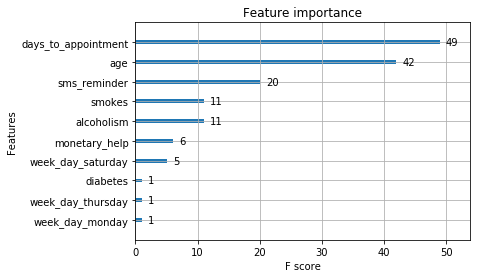

In [6]:
from xgboost import plot_importance
plot_importance(model)

In [8]:
model.feature_importances_

array([ 0.39141187,  0.18872881,  0.01990418,  0.05586574,  0.        ,
        0.        ,  0.05908027,  0.06034659,  0.        ,  0.09849595,
        0.        ,  0.        ,  0.        ,  0.08938853,  0.02402241,
        0.        ,  0.01275565,  0.        ,  0.        ], dtype=float32)

# Clustering

### Prediction test

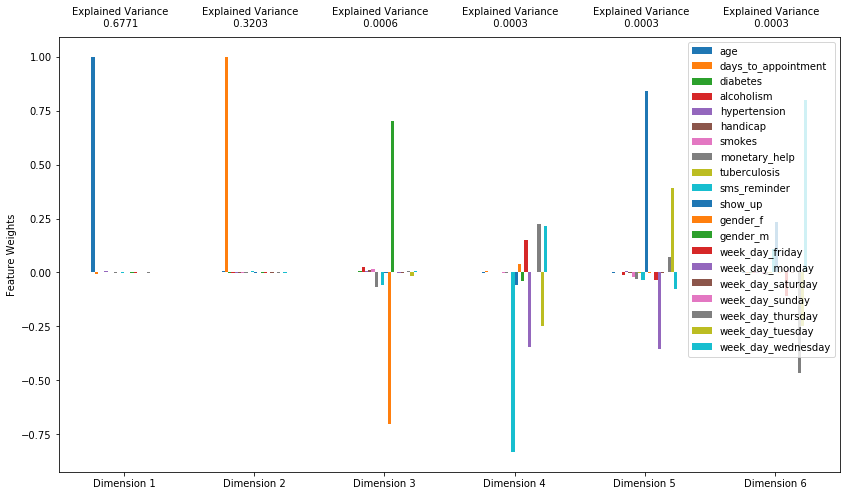

In [5]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
import visuals as vs

pca = PCA(n_components=6).fit(data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(data)

# Generate PCA results plot
pca_results = vs.pca_results(data, pca)

In [7]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(data)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

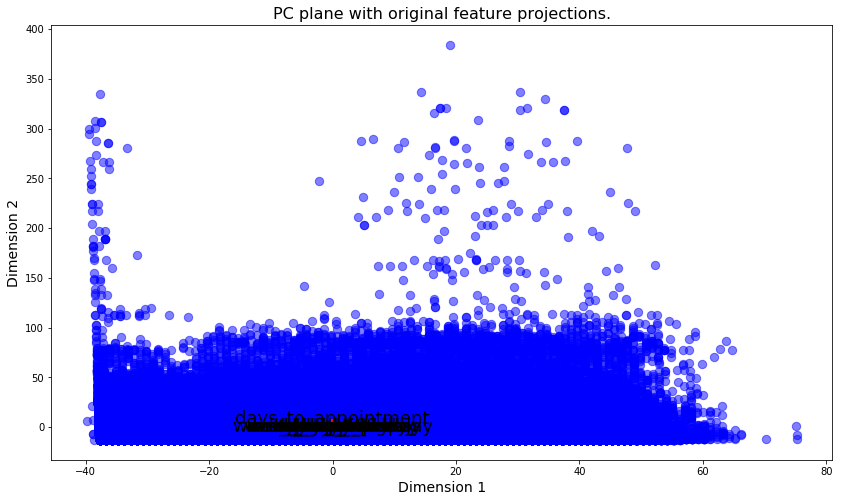

In [8]:
# Create a biplot
vs.biplot(data, reduced_data, pca)

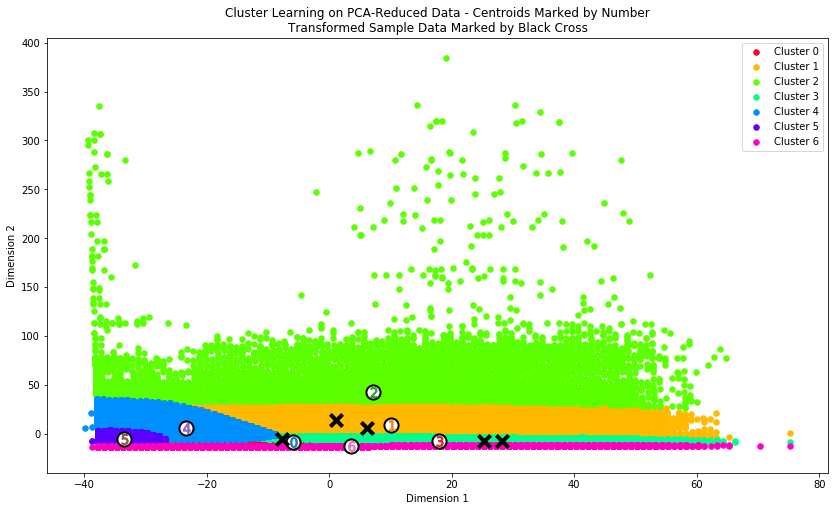

In [9]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

clusterer = GaussianMixture(n_components=7).fit(reduced_data)
samples = reduced_data[1000:1005]
preds = clusterer.predict(reduced_data)
centers = clusterer.means_

vs.cluster_results(reduced_data, preds, centers, samples)

In [10]:
preds_proba = clusterer.predict_proba(samples)

In [11]:
preds_deter = clusterer.predict(samples)

In [12]:
clustered_data = data.assign(cluster = pd.Series(preds))

In [13]:
clustered_data.head()

,age,days_to_appointment,diabetes,alcoholism,hypertension,handicap,smokes,monetary_help,tuberculosis,sms_reminder,...,gender_f,gender_m,week_day_friday,week_day_monday,week_day_saturday,week_day_sunday,week_day_thursday,week_day_tuesday,week_day_wednesday,cluster
0,19,29,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,4
1,24,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,6
2,4,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,6
3,5,15,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,5
4,38,6,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [16]:
pivot = clustered_data.pivot_table(index='cluster', values=['age', 'days_to_appointment', 'show_up'])

(7, 3)

In [17]:
pivot

,age,days_to_appointment,show_up
cluster,,,
0,30.444144,5.210675,0.693486
1,49.374208,24.059423,0.676290
2,45.861171,69.651697,0.648006
3,58.226395,6.833305,0.757253
4,13.207721,21.648077,0.608239
5,3.721510,8.721557,0.675477
6,41.266058,1.476544,0.756711


In [59]:
preds_proba

array([[  1.14129844e-243,   4.44940129e-016,   9.75075893e-001,
          2.32054687e-030,   2.18742784e-002,   7.40684637e-004,
          2.30914418e-003],
       [  2.85780053e-040,   2.80056197e-001,   1.42009512e-001,
          1.66407272e-012,   8.57453355e-003,   4.20000249e-001,
          1.49359509e-001],
       [  1.13299083e-021,   8.53979793e-002,   9.96660784e-002,
          3.85081994e-063,   3.37455738e-003,   8.11561118e-001,
          2.67284102e-007],
       [  0.00000000e+000,   1.71607222e-036,   9.63561017e-001,
          5.71407258e-026,   3.22960745e-002,   1.61118880e-009,
          4.14290673e-003],
       [  1.06623987e-021,   6.49831859e-002,   1.04299807e-001,
          1.32857018e-069,   3.49748246e-003,   8.27219477e-001,
          4.76248217e-008]])

In [87]:
samples.iloc[:, 0]

1000     6.155358
1001    -7.788321
1002    25.224293
1003     1.109549
1004    28.226338
Name: Dimension 1, dtype: float64

In [12]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

score_results = {}
for i in range(2, 8):
    clusterer = GaussianMixture(n_components=i).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    centers = clusterer.means_
    sample_preds = clusterer.predict(pca_samples)
    score = silhouette_score(reduced_data, preds)
    score_results[i] = score
    print("n_components={}: {}".format(i, round(score, 4)))

n_components = max(score_results, key=score_results.get)
print("\nChosen score: {} | Chosen n_components: {}".format(max(score_results), n_components))

# TODO: Apply your clustering algorithm of choice to the reduced data
clusterer = GaussianMixture(n_components=2).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
# sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

n_components=2: 0.1973
n_components=3: 0.1712


KeyboardInterrupt: 

In [ ]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)